In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.columns    

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [5]:
df['month'].unique()

array(['6', '7', '8', '9', nan, 'month'], dtype=object)

In [6]:
df['Classes'].unique()

array(['not fire', 'fire', nan, 'Classes'], dtype=object)

In [7]:
[features for features in df.columns if df[features].isnull().sum()>1]

['month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [8]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']]=df[['Region']].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [11]:
df = df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [13]:
df = df.drop(122).reset_index(drop=True)

In [14]:
df.shape

(243, 15)

In [15]:
df[['month','day','year']] = df[['month','day','year']].astype(int)
df[['Temperature','RH','Ws']] = df[['Temperature','RH','Ws']].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(3), int32(4), object(8)
memory usage: 24.8+ KB


In [17]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i!= 'Classes':
        df[i]=df[i].astype(float)

In [18]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(10), int32(4), object(1)
memory usage: 24.8+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [21]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


<Axes: >

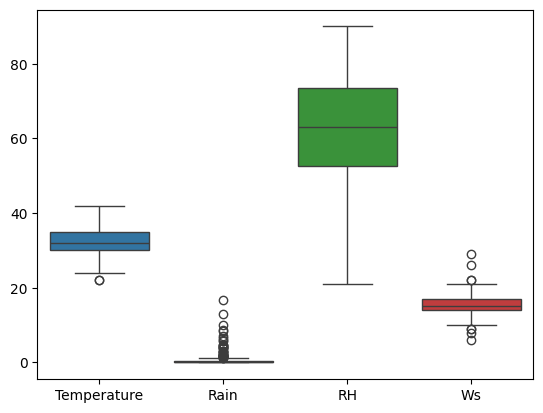

In [22]:
sns.boxplot(df[['Temperature','Rain','RH','Ws']])

In [23]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [24]:
df.Classes = df.Classes.str.strip()
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [25]:
df[:122].shape

(122, 15)

In [26]:
df[122:].shape

(121, 15)

In [27]:
df.to_csv('Algerian_forest_fires_dataset_Cleaned.csv',index=False)

In [28]:
df1 = df.drop(['day','month','year'],axis=1)

In [29]:
df1['Classes'] = np.where(df1['Classes']=='not fire',0,1)

In [30]:
df1['Classes'].unique()

array([0, 1])

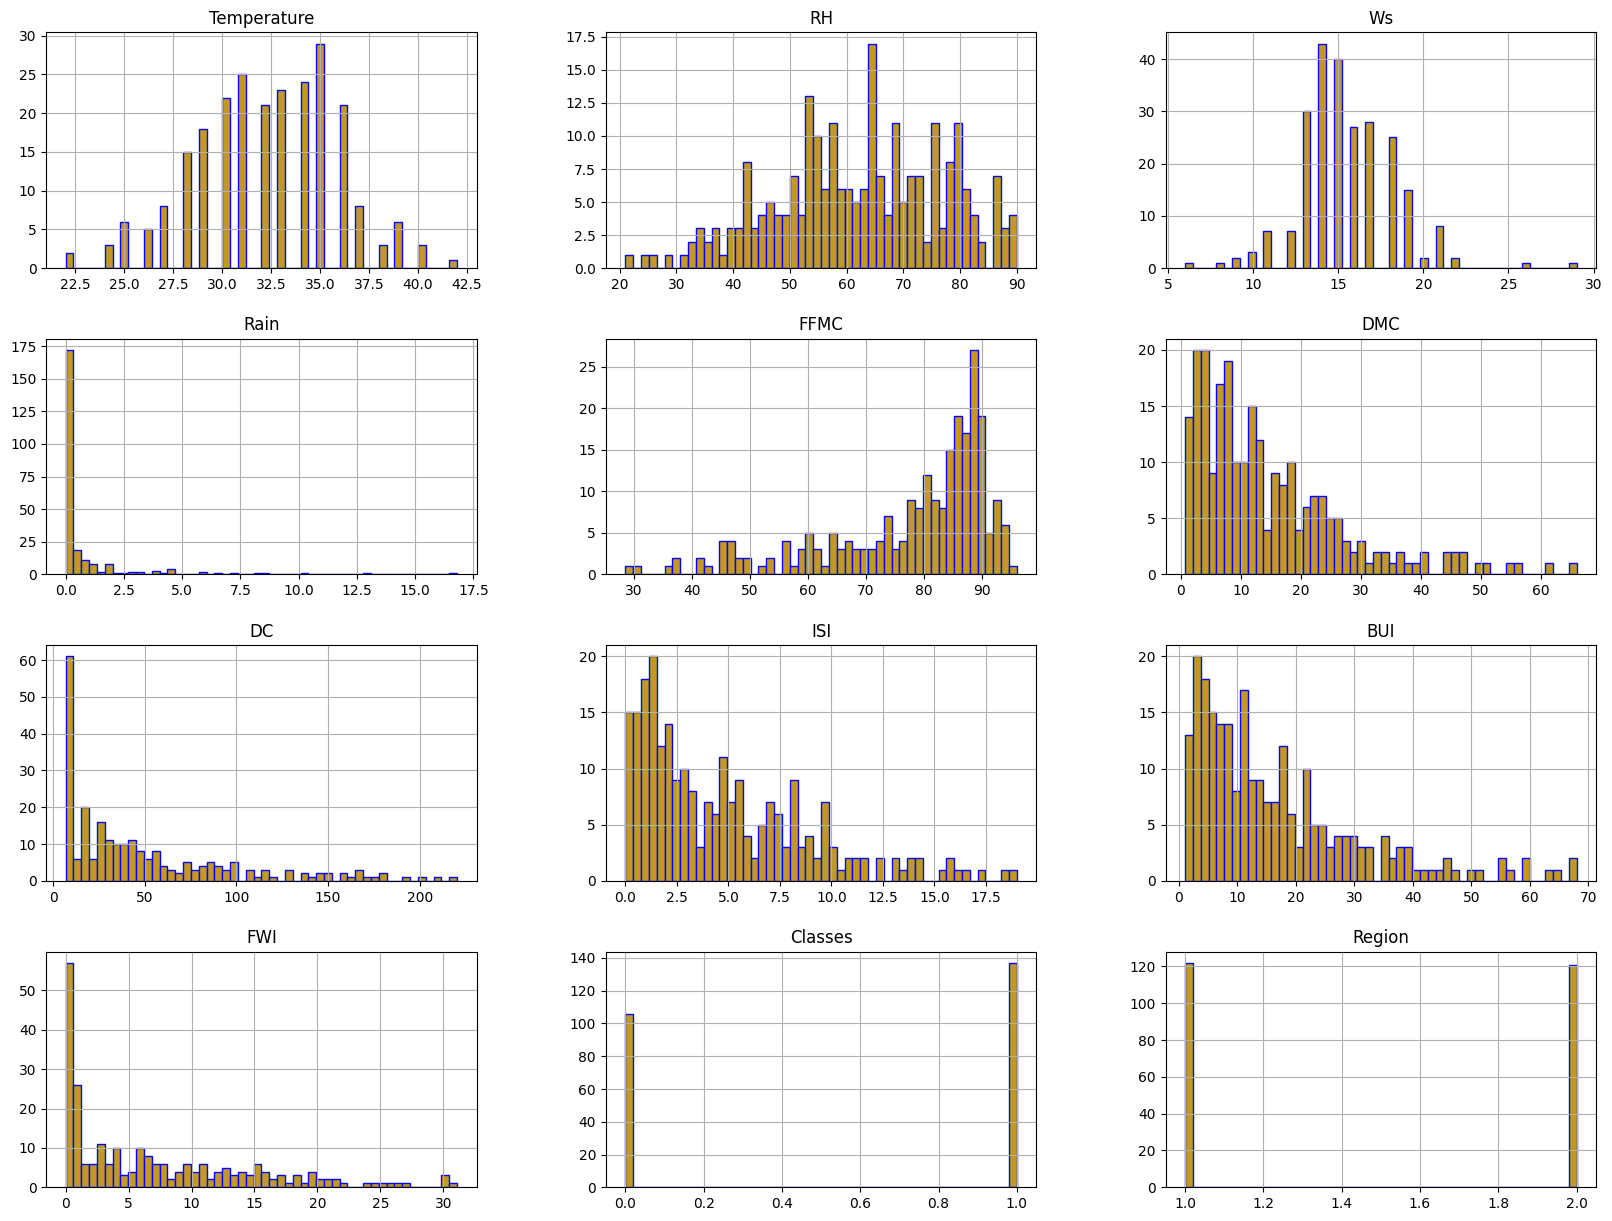

In [31]:
df1.hist(bins=50,figsize=(20,15),ec='b',color='#c49923')
plt.show()

In [32]:
percentage = df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

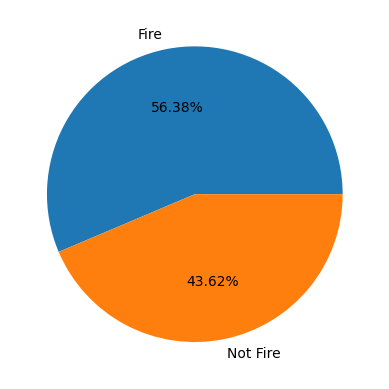

In [33]:
classeslabels = ['Fire','Not Fire']
plt.pie(percentage,labels=classeslabels,autopct='%1.2f%%')
plt.show()

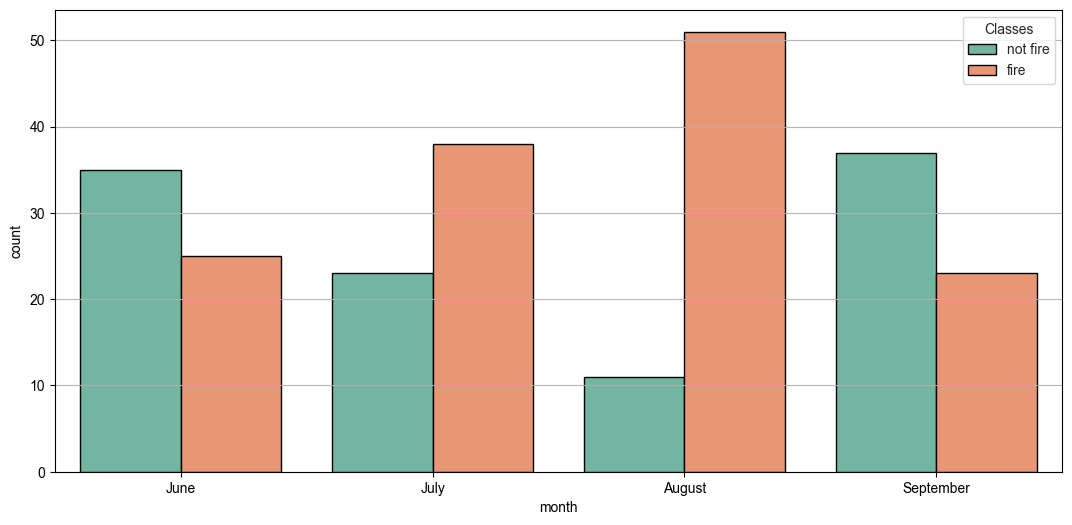

In [34]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df,ec='black',palette='Set2')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.grid(alpha=0.9,axis='y')

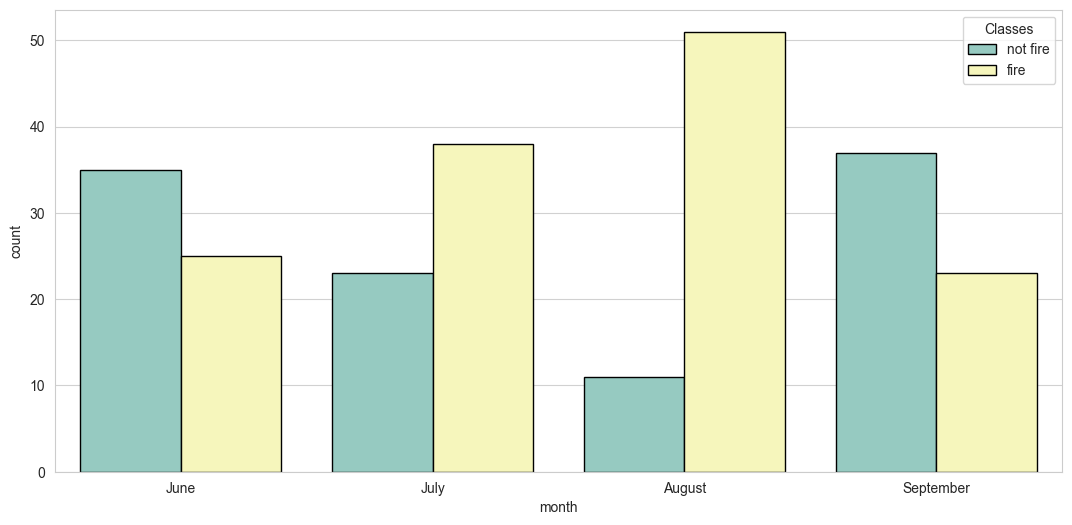

In [35]:
dftemp = df.loc[df['Region']==2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df,ec='black',palette='Set3')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.grid(alpha=0.9,axis='y')

In [40]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature=df1.groupby([feature],as_index=False)['Classes'].sum()
    ax=sns.barplot(x=feature,y='Classes',data=by_feature[[feature,'Classes']],estimator=sum)
    ax.set(xlabel=xlabel,ylabel='Fire Count')

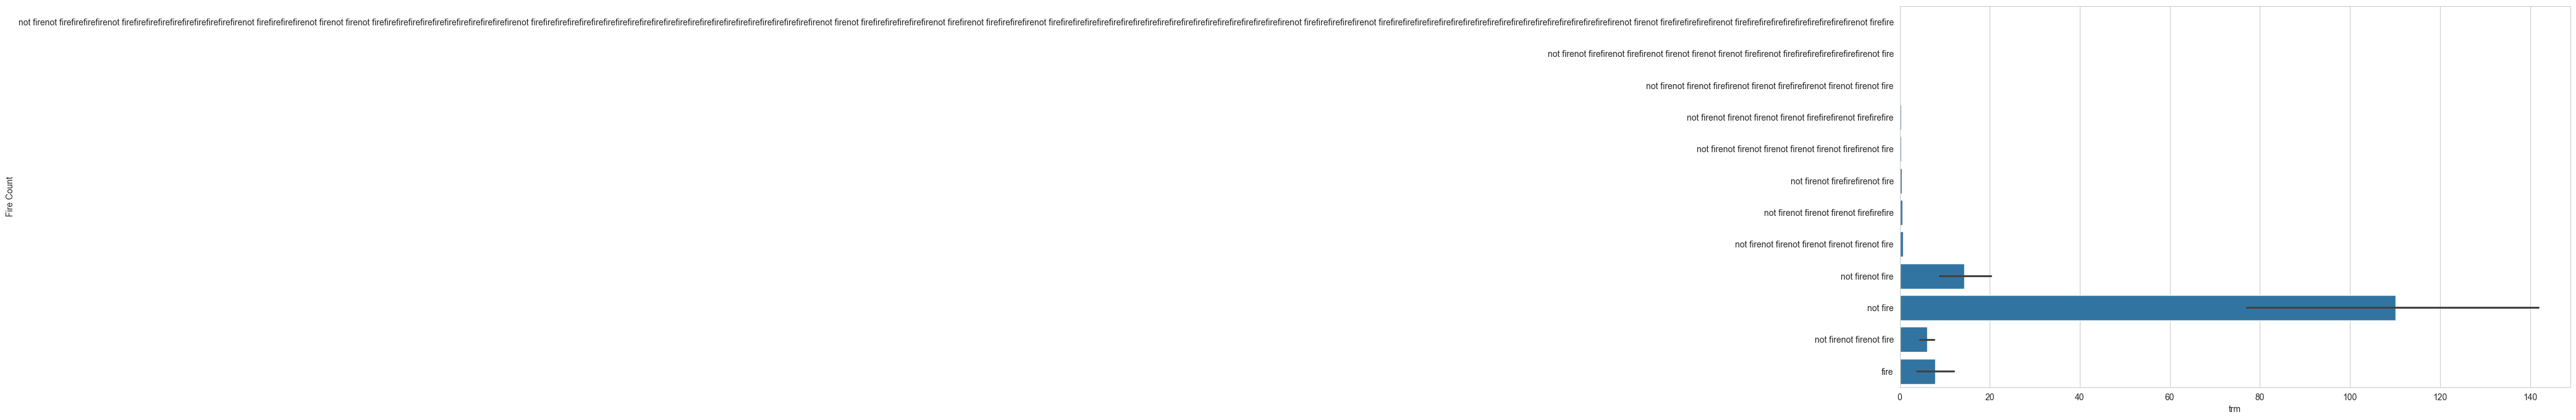

In [37]:
barchart('Rain','trm')

In [39]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
